In [60]:
import pandas as pd

In [61]:
### Step 1: Read the "CSV" file

df = pd.read_csv("UniversalBank.csv")
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [62]:
### Step 2: Exploratory Data Analysis

# 2.1. How many columns in the datasets
df.info()
print(df.columns)

# 2.2. Determine the data types of the columns
print(df.dtypes)

# 2.3. Check missing values
print(df.isnull().sum())

# 2.4. Drop the ID column
df = df.drop(['ID','ZIP Code'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 

In [63]:
# 2.4. Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


# Univariate Analysis

In [120]:
# 2.5. Determine the shape of Numerical Variables through Distribution 
# Also determine the Outliers in the Numerical Values

# The Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(8, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [121]:
# The Function to create labeled bar plots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Note that Histograms are used for Numerical Variables
# Boxplots are used for Outliers
# And Barplots are used for Categorical Variables

# Observation on Age

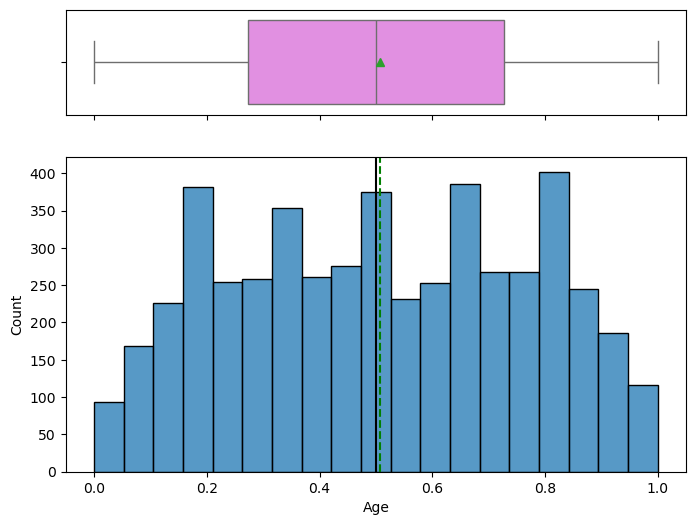

In [122]:
histogram_boxplot(df,'Age')

# Observation on Income

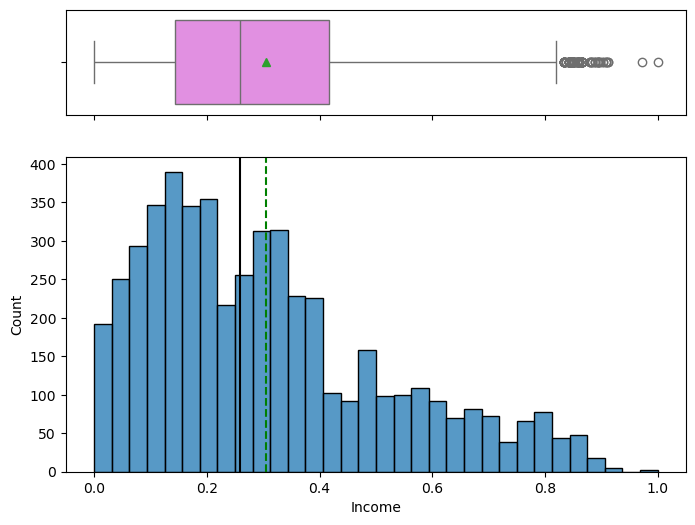

In [123]:
histogram_boxplot(df,'Income')

# Observation on Credit Card

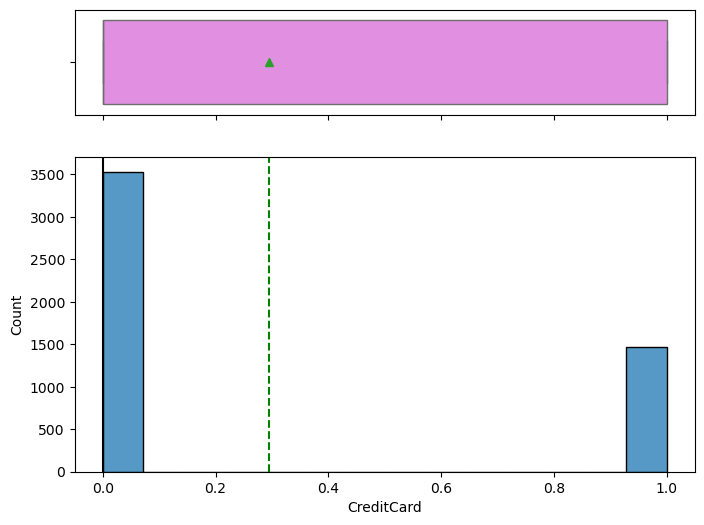

In [124]:
histogram_boxplot(df,'CreditCard')

# Observation on Mortgage

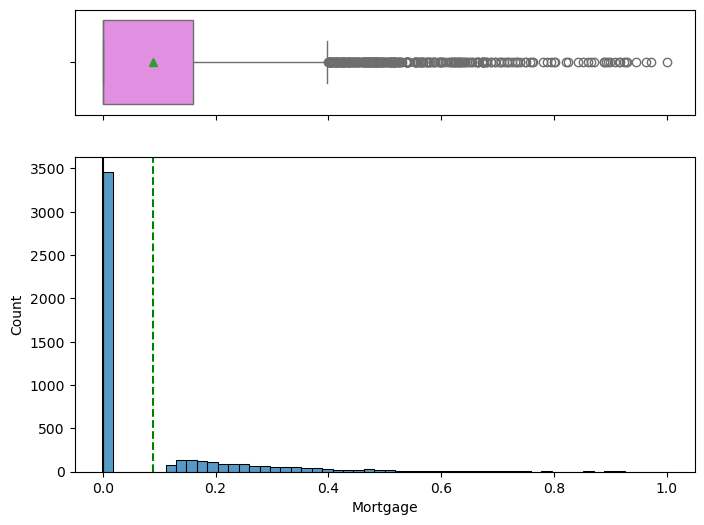

In [125]:
histogram_boxplot(df,'Mortgage')

# Observation on Securities Account

C:\Users\claud\AppData\Local\Temp\ipykernel_15852\225477095.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


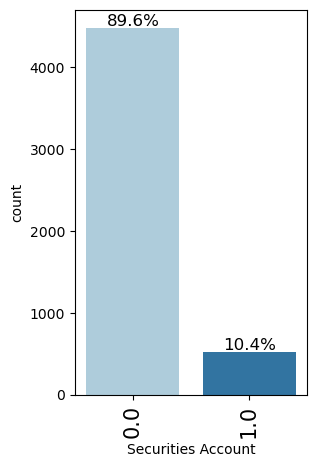

In [127]:
labeled_barplot(df, "Securities Account", perc=True)

# Correlation Matrix - Multicollinearity

In [ ]:
### The Correlation Matrix will help us to see if there are numerical variables correlated among themselves.

# Note that Correlation could be Positive or Negative and Strong or Weak.

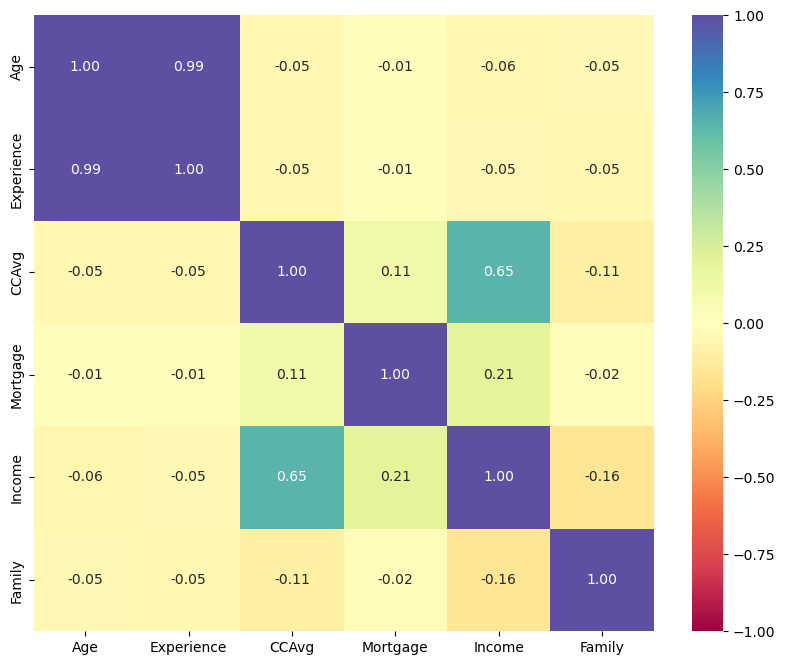

In [131]:

# Start by identifying ONLY numerical columns
cols_list = ["Age","Experience","CCAvg","Mortgage","Income","Family"]

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Age & Experience are strongly correlated
### Income & CCAvg are also strongly correlated

In [64]:
# 2.5. Create Dummy Variables for "Education"

# Convert Education into categorical values
df['Education'] = pd.Categorical(df['Education'], 
                                      categories=["Undergrad", "Graduate", "Advanced"])

# Creating dummy variables
education_dummies = pd.get_dummies(df['Education'], prefix ='Education')

# Joining dummies back to the main DataFrame
df = pd.concat([df, education_dummies], axis=1)


In [65]:
### Step 3: Data Preprocessing 

# 3.1. Normalization 
# Recall that Normalization is ONLY done on numerical variables
# So, I need to exclude all categorical variables Personal Loan, Education
from sklearn.preprocessing import MinMaxScaler

exclude_cols = ['Personal Loan',' Education']
numeric_cols = df.select_dtypes(include='number').columns.difference(exclude_cols)


# Normalize the datasets
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [66]:
# Rename the Normalized Datasets

normalized_df = df[numeric_cols]

In [67]:
# See the Statistical Summary of the Normalized Datasets

normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,0.507691,0.260526,0.0,0.272727,0.500000,0.727273,1.0
CCAvg,5000.0,0.193794,0.174766,0.0,0.070000,0.150000,0.250000,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.000000,0.000000,0.000000,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.000000,0.000000,1.000000,1.0
Experience,5000.0,0.502274,0.249303,0.0,0.282609,0.500000,0.717391,1.0
Family,5000.0,0.465467,0.382554,0.0,0.000000,0.333333,0.666667,1.0
Income,5000.0,0.304510,0.213119,0.0,0.143519,0.259259,0.416667,1.0
Mortgage,5000.0,0.088974,0.160179,0.0,0.000000,0.000000,0.159055,1.0
Online,5000.0,0.596800,0.490589,0.0,0.000000,1.000000,1.000000,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.000000,0.000000,0.000000,1.0


In [68]:
# 3.2. Partitioning

from sklearn.model_selection import train_test_split

# Before Partitioning, add the Personal Loan nd Education Variables
normalized_df['Personal Loan'] = df['Personal Loan']

# Add the dummy variables to the normalized dataset
normalized_df = pd.concat([normalized_df, education_dummies], axis=1)

print(normalized_df)

           Age  CCAvg  CD Account  CreditCard  Experience    Family    Income  \
0     0.045455   0.16         0.0         0.0    0.086957  1.000000  0.189815   
1     0.500000   0.15         0.0         0.0    0.478261  0.666667  0.120370   
2     0.363636   0.10         0.0         0.0    0.391304  0.000000  0.013889   
3     0.272727   0.27         0.0         0.0    0.260870  0.000000  0.425926   
4     0.272727   0.10         0.0         1.0    0.239130  1.000000  0.171296   
...        ...    ...         ...         ...         ...       ...       ...   
4995  0.136364   0.19         0.0         0.0    0.130435  0.000000  0.148148   
4996  0.159091   0.04         0.0         0.0    0.152174  1.000000  0.032407   
4997  0.909091   0.03         0.0         0.0    0.913043  0.333333  0.074074   
4998  0.954545   0.05         0.0         0.0    0.934783  0.666667  0.189815   
4999  0.113636   0.08         0.0         1.0    0.152174  0.666667  0.347222   

      Mortgage  Online  Sec

C:\Users\claud\AppData\Local\Temp\ipykernel_15852\2842185639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df['Personal Loan'] = df['Personal Loan']


In [69]:
# After adding the "Personal Loan" and "Education" columns
print(normalized_df.columns)

Index(['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Experience', 'Family',
       'Income', 'Mortgage', 'Online', 'Securities Account', 'Personal Loan',
       'Education_Undergrad', 'Education_Graduate', 'Education_Advanced'],
      dtype='object')


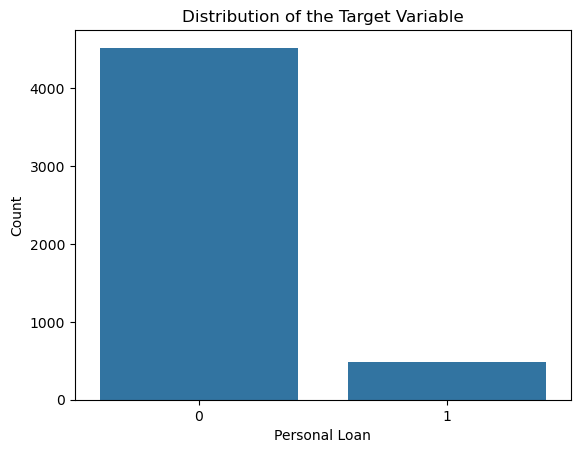

In [115]:
# Let's check if the Datasets is balanced
# Use the Target Variable " Personal Loan"
# 1 = Personal Loan and 0 = Non Personal Loan

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Personal Loan', data=df)
plt.title("Distribution of the Target Variable")
plt.xlabel("Personal Loan")
plt.ylabel("Count")
plt.show()

In [91]:
# Partitioning the datasets

x = normalized_df.drop(columns = ['Personal Loan'])
y = normalized_df['Personal Loan']
# Splitting the dataset into the Training and Testing set.

# Splitting the dataset into the Training and Testing set.

x_large, x_test, y_large, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42,stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_large,y_large, test_size = 0.25, random_state = 42,stratify=y_large)

print(f"Training Sample:{x_train.shape[0]},Validation Sample:{x_val.shape[0]}, Testing Sample:{x_test.shape[0]}")

Training Sample:3000,Validation Sample:1000, Testing Sample:1000


In [85]:
### Step 4: Data Modeling- Neural Network Model

# 4.1. Create Neural Network with SDG Optimizer

from tensorflow import keras
keras.backend.clear_session()

import numpy as np
import random
import tensorflow as tf

# 4.1.1. Fixing the seed for random number generators to ensure we receive the same output every time
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [86]:
# 4.1.2. Initializing the neural network
model_0 = Sequential()

#Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64,activation='relu',input_dim = x_train.shape[1]))

# Adding the first hidden layer with 32 neurons with relu as activation functions
model_0.add(Dense(32,activation='relu'))

# Adding the output layer
model_0.add(Dense(1, activation = 'sigmoid'))

#Compiling the ANN with SGD optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# Complining the model with binary cross entropy as loss function and accuracy as metrics
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[keras.metrics.Recall()])

C:\Users\claud\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# 4.1.3. Determine the Model Summary

model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# 4.1.4. Fitting the ANN with batch_size = 32 and 100 epochs

history_0 = model_0.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    batch_size=32,
    epochs=100,
    verbose=1
)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2832 - recall: 0.0000e+00 - val_loss: 0.2919 - val_recall: 0.0000e+00
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2826 - recall: 0.0000e+00 - val_loss: 0.2913 - val_recall: 0.0000e+00
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2820 - recall: 0.0000e+00 - val_loss: 0.2907 - val_recall: 0.0000e+00
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2814 - recall: 0.0000e+00 - val_loss: 0.2900 - val_recall: 0.0000e+00
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2808 - recall: 0.0000e+00 - val_loss: 0.2894 - val_recall: 0.0000e+00
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2802 - recall: 0.0000e+00 - val_loss: 0.2888 - val_recall: 0.0000e+00
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2795 - recall: 0.0000e+00 - val_loss: 0.2882 - val_recall: 0.0000e+00
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2789 - recall: 0.0000e

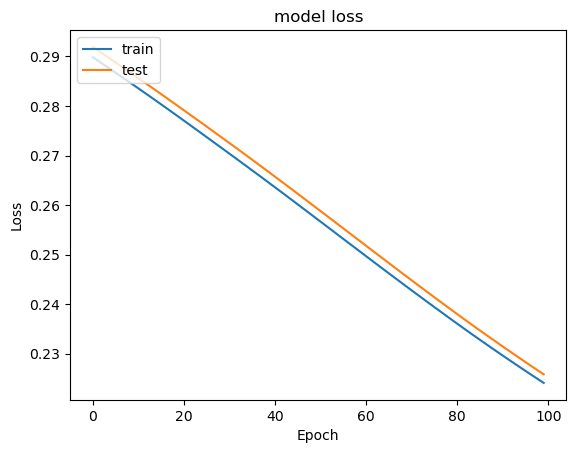

In [94]:
# 4.2. Plotting Train Loss 

plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

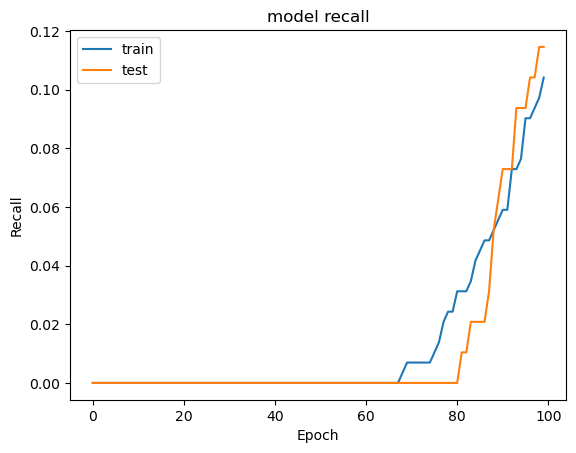

In [95]:
#4.3. Plotting Train recall vs Validation recall

plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
# 4.4. Predicting the results using best as a threshold
y_train_pred = model_0.predict(x_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [97]:
# 4.5. Predicting the results using 0.5 as the threshold
y_val_pred = model_0.predict(x_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [101]:
# 4.6. Determine the Recall on Train Datasets
from sklearn.metrics import recall_score

model_name = "NN with SGD"

### I can create the two blank data frames to store the recall values for all the model built

train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [103]:
# 4.7. Classification report and Confusion Matrix

from sklearn.metrics import classification_report

cr=classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2712
           1       0.88      0.10      0.19       288

    accuracy                           0.91      3000
   macro avg       0.90      0.55      0.57      3000
weighted avg       0.91      0.91      0.88      3000



In [104]:
# 4.7.1. Classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       904
           1       0.92      0.11      0.20        96

    accuracy                           0.91      1000
   macro avg       0.92      0.56      0.58      1000
weighted avg       0.91      0.91      0.88      1000



In [107]:
# Custom function
def make_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    # Your custom plotting or processing logic here
    return cm

# Call the function
cm = make_confusion_matrix(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

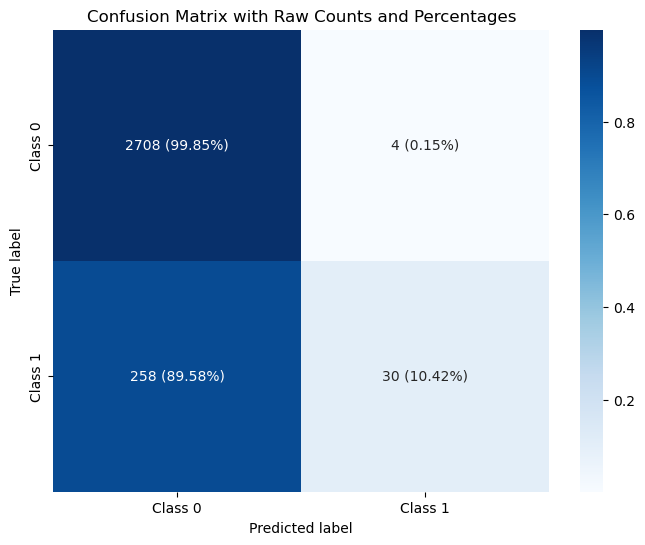

In [114]:
# 4.7.2. Compute confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Normalize the confusion matrix by row (true labels)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a string array for annotations that combines raw counts and percentages
annotations = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annotations[i, j] = f"{cm[i, j]} ({cm_percentage[i, j]:.2%})"

# Plot confusion matrix using seaborn heatmap with both raw counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=annotations, fmt="", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Raw Counts and Percentages')
plt.show()

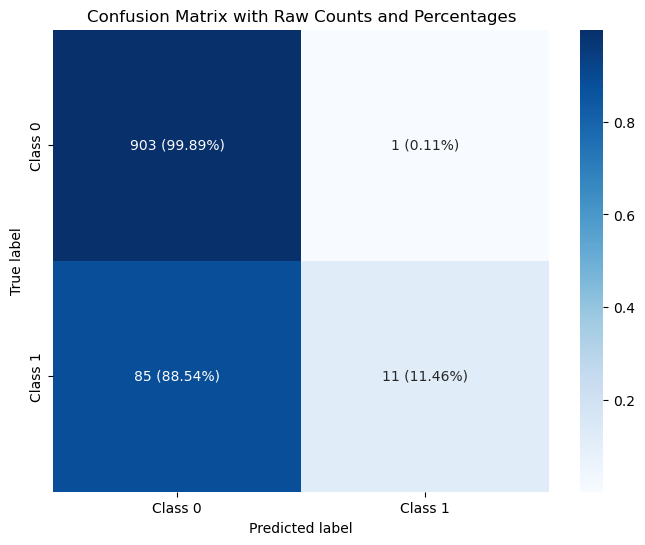

In [113]:
# 4.7.3. Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Normalize the confusion matrix by row (true labels)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a string array for annotations that combines raw counts and percentages
annotations = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annotations[i, j] = f"{cm[i, j]} ({cm_percentage[i, j]:.2%})"

# Plot confusion matrix using seaborn heatmap with both raw counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=annotations, fmt="", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Raw Counts and Percentages')
plt.show()